In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import seaborn as sns
import os
from gamap_colormap import WhGrYlRd  # import the "WhGrYlRd" variable from my custom Python script
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import ScalarFormatter,AutoMinorLocator 
plt.style.use(
    "https://github.com/aeturrell/coding-for-economists/raw/main/plot_style.txt"
)
mpl.rcParams.update({"lines.linewidth": 1.2})
# Set max rows displayed for readability
pd.set_option("display.max_rows", 8)
import warnings
warnings.filterwarnings("ignore")



In [68]:

# workstation = "deepnote"
# workstation = "laptop"
workstation = 'svante'

if workstation=='laptop':
    fig_path='/Users/shakes/Dropbox/Apps/Overleaf/Thandolwethu Dlamini Thesis/templates/figures/'
elif workstation=='svante':
    fig_path = "/home/tzd/fs03/d1/tzd/Data_analysis/RAworkflow/MIT_TPP_thesis/UpdatedFigures/chapter_1/"
else:
    fig_path='/work/MIT_TPP_thesis/figures/'

In [69]:
# os.chdir('/home/tzd/fs03/d1/tzd/Data_analysis/MIT_TPP_thesis/JPnotebooks/GMA2018')

In [70]:
total_estimates={
    "gma_2015":{'lbound':55.18,
                'ubound':165.543,
                'actual':110.36},
    "AGC_2018":{'lbound':54.37,
                'ubound':163.11,
                'actual':108.74},
    "TPP_2015":{'lbound':11.45,
                'ubound':236.69,
                'actual':101},
        
    }

In [71]:
df_est=pd.DataFrame(total_estimates)
df_est

,gma_2015,AGC_2018,TPP_2015
lbound,55.180,54.37,11.45
ubound,165.543,163.11,236.69
actual,110.360,108.74,101.00


In [72]:
gma=df_est['gma_2015'].loc['actual']
tpp=df_est['TPP_2015'].loc['actual']
agc=df_est['AGC_2018'].loc['actual']

print(f"GMA 2018 under prediction: {gma/tpp}")
print(f"AGC under prediction: {agc/tpp}")

GMA 2018 under prediction: 1.0926732673267328
AGC under prediction: 1.0766336633663365


In [73]:
fig = go.Figure()
fig.add_trace(go.Bar(
    name='GMA 2018 Estimate',
    x=['GMA 2018 Estimate'], y=[df_est['gma_2015'].loc['actual']],
    error_y=dict(type='percent', symmetric=False,
            value=50,
            valueminus=50)
))
fig.add_trace(go.Bar(
    name='AGC Estimate',
    x=['AGC Estimate'], y=[df_est['AGC_2018'].loc['actual']],
    error_y=dict(type='percent', symmetric=False,
            value=50,
            valueminus=50)
))
fig.add_trace(go.Bar(
    name='Top Down Estimate',
    x=['Top Down Estimate'], y=[df_est['TPP_2015'].loc['actual']],
    error_y=dict(type='percent', symmetric=False,
            value=133,
            valueminus=90)
))

fig.update_layout(barmode='group')
fig.update_traces(width=0.5)
fig.update_layout(
    autosize=False,
     width=700,
     height=400,
    template="simple_white",
    margin={"r":0,"t":0,"l":60,"b":30},
    yaxis =  {'showgrid': True} 
)

fig.update_layout(
                  xaxis_type='category',
                  yaxis_type='linear',
                  yaxis=dict(
                      title="Hg (t/y)",
                      titlefont_size=16,
                      tickfont_size=14,),
                  bargap=0.00, # gap between bars of adjacent location coordinates.
                  legend=dict(
        title=None, orientation="h", y=1.0, yanchor="bottom", x=0.5, xanchor="center"))
fig.update_yaxes(nticks=10)
fig.show()
fig_name='all_asgm_hgEstimates.svg'
path=fig_path+fig_name
pio.write_image(fig, path,format='svg',width=700,height=400)
# fig.write_image(path,format='svg',width=700,height=400)

In [74]:
GlobalHgInventry={
'Fuel combustion':533,
'Industry Sectors':614,
'Intentional Use(including product waste)':239,
'Artisanal and Small Scale Gold Mining':838,
'Total':2220,
'Total Lower':2000,
'Total Upper':2820}

In [75]:
ASGM_perRegion={
'Australia, New Zealand & Oceania':0.0,
'Central America and the Caribbean':14.3,
'CIS & other European countries':12.7,
'East and Southeast Asia':214,
'EU28':0.0,
'Middle Eastern States':0.225,
'North Africa':0.0,
'North America':0.0,
'South America':340,
'South Asia':4.50,
'Sub-Saharan Africa':252
}
df_asgmPregion=pd.DataFrame([ASGM_perRegion])
df_asgmPregion=df_asgmPregion.T
df_asgmPregion=df_asgmPregion.sort_values(by=[0])
df_asgmPregion=df_asgmPregion.reset_index()
df_asgmPregion=df_asgmPregion.rename(columns={'index':'World Regions',0:"ASGM Emission(t)"})

In [76]:
df_asgmPregion

,World Regions,ASGM Emission(t)
0,"Australia, New Zealand & Oceania",0.0
1,EU28,0.0
2,North Africa,0.0
3,North America,0.0
...,...,...
7,Central America and the Caribbean,14.3
8,East and Southeast Asia,214.0
9,Sub-Saharan Africa,252.0
10,South America,340.0


In [77]:
(214+252+340)/df_asgmPregion['ASGM Emission(t)'].sum()

0.9621295771285326

[Text(0, 0, 'Australia, New Zealand & Oceania'),
 Text(1, 0, 'EU28'),
 Text(2, 0, 'North Africa'),
 Text(3, 0, 'North America'),
 Text(4, 0, 'Middle Eastern States'),
 Text(5, 0, 'South Asia'),
 Text(6, 0, 'CIS & other European countries'),
 Text(7, 0, 'Central America and the Caribbean'),
 Text(8, 0, 'East and Southeast Asia'),
 Text(9, 0, 'Sub-Saharan Africa'),
 Text(10, 0, 'South America')]

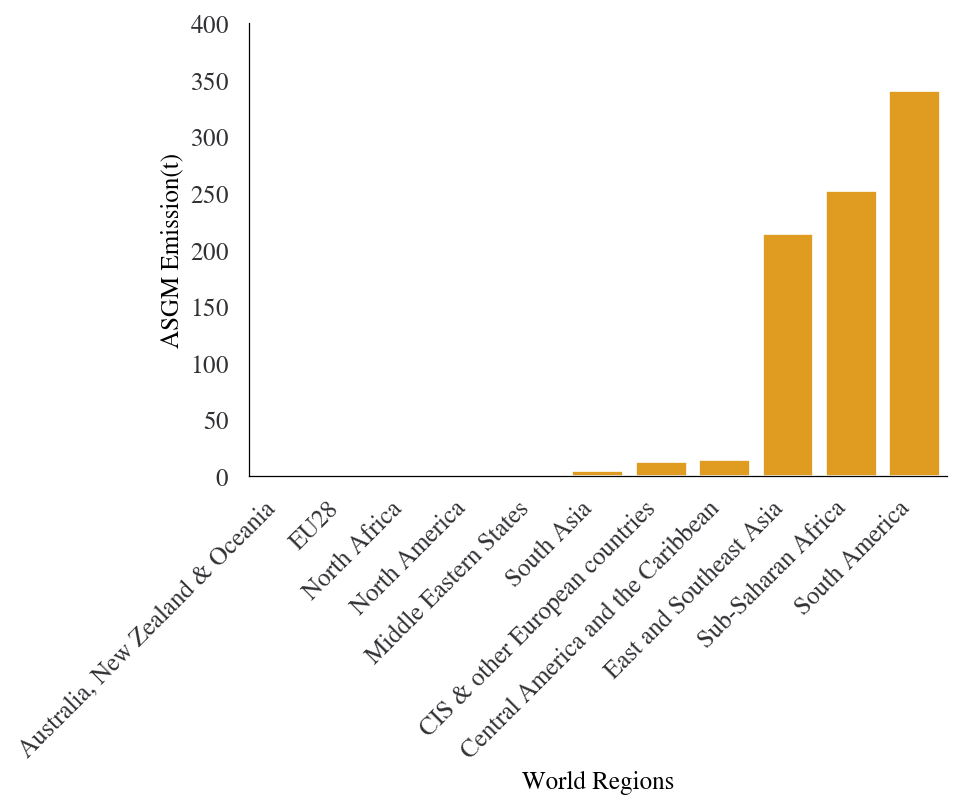

In [78]:


# Make a barplot
chart=sns.barplot(
    x="World Regions", 
    y="ASGM Emission(t)", 
    data=df_asgmPregion, 
    color='#FFA500'
);
# Rotate tick labels
chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right')


In [79]:
((8*1393.23)+(2*1432.90))

14011.64

In [80]:
# ASGM Artisanal and small-scale gold mining 679 838
# BIO Biomass burning (domestic, industrial and power plant) 49.5 51.9
# CEM Cement production (raw materials and fuel, excluding coal)a 187 233
# CREM Cremation emissions 4.91 3.77
# CSP Chlor-alkali production (mercury process) 21.0 15.2
# NFMP Non-ferrous metal production (primary Al, Cu, Pb, Zn)a 151 228
# NFMP-AU Large-scale gold production) 73.1 84.5
# NFMP-HG Mercury production) 12.2 13.8
# OR Oil refining 13.1 14.4
# PISP Pig iron and steel production (primary)a 26.7 29.8
# SC-DR-coal Stationary combustion of coal (domestic/residential, transportation) 54.4 55.8
# SC-DR-gas Stationary combustion of gas (domestic/residential, transportation) 0.162 0.165
# SC-DR-oil Stationary combustion of oil (domestic/residential, transportation) 2.63 2.70
# SC-IND-coal Stationary combustion of coal (industrial) 123 126
# SC-IND-gas Stationary combustion of gas (industrial) 0.115 0.123
# SC-IND-oil Stationary combustion of oil (industrial) 3.05 1.40
# SC-PP-coal Stationary combustion of coal (power plants) 268 292
# SC-PP-gas Stationary combustion of gas (power plants) 0.319 0.349
# SC-PP-oil Stationary combustion of oil (power plants) 2.58 2.44
# SSC Secondary steel production 9.69 10.1
# VCM Vinyl-chloride monomer (mercury catalyst) b 58.3
# WASOTH Waste (other waste)c 115 147
# WI Waste incineration (controlled burning)c 15.4 15.0
# Total 1810 2220
# a

In [81]:
ASGM_emissions=pd.read_csv('hgASGM.csv')
ASGM_emissions['Country']=ASGM_emissions['Country'].str.strip()

In [82]:
air_emissions=pd.DataFrame(ASGM_emissions['Country'])
print(air_emissions)

       Country
0      Bolivia
1       Guinea
2    Nicaragua
3         Peru
..         ...
75    Eswatini
76     Ukraine
77  Uzbekistan
78      Zambia

[79 rows x 1 columns]


In [83]:
air_emissions['Emissions, t']=ASGM_emissions['Mean air emission, t']

In [84]:
air_emissions

,Country,"Emissions, t"
0,Bolivia,40.5
1,Guinea,14.3
2,Nicaragua,0.7
3,Peru,110.4
...,...,...
75,Eswatini,0.2
76,Ukraine,0.2
77,Uzbekistan,0.2
78,Zambia,0.2


In [85]:
# fig = px.treemap(air_emissions, path=[px.Constant('Average Air Emissions from ASGM Activities'),'Country'], 
#                 values='Emissions, t',
#                 color='Emissions, t',
#                 color_continuous_scale='reds')
# fig.show()

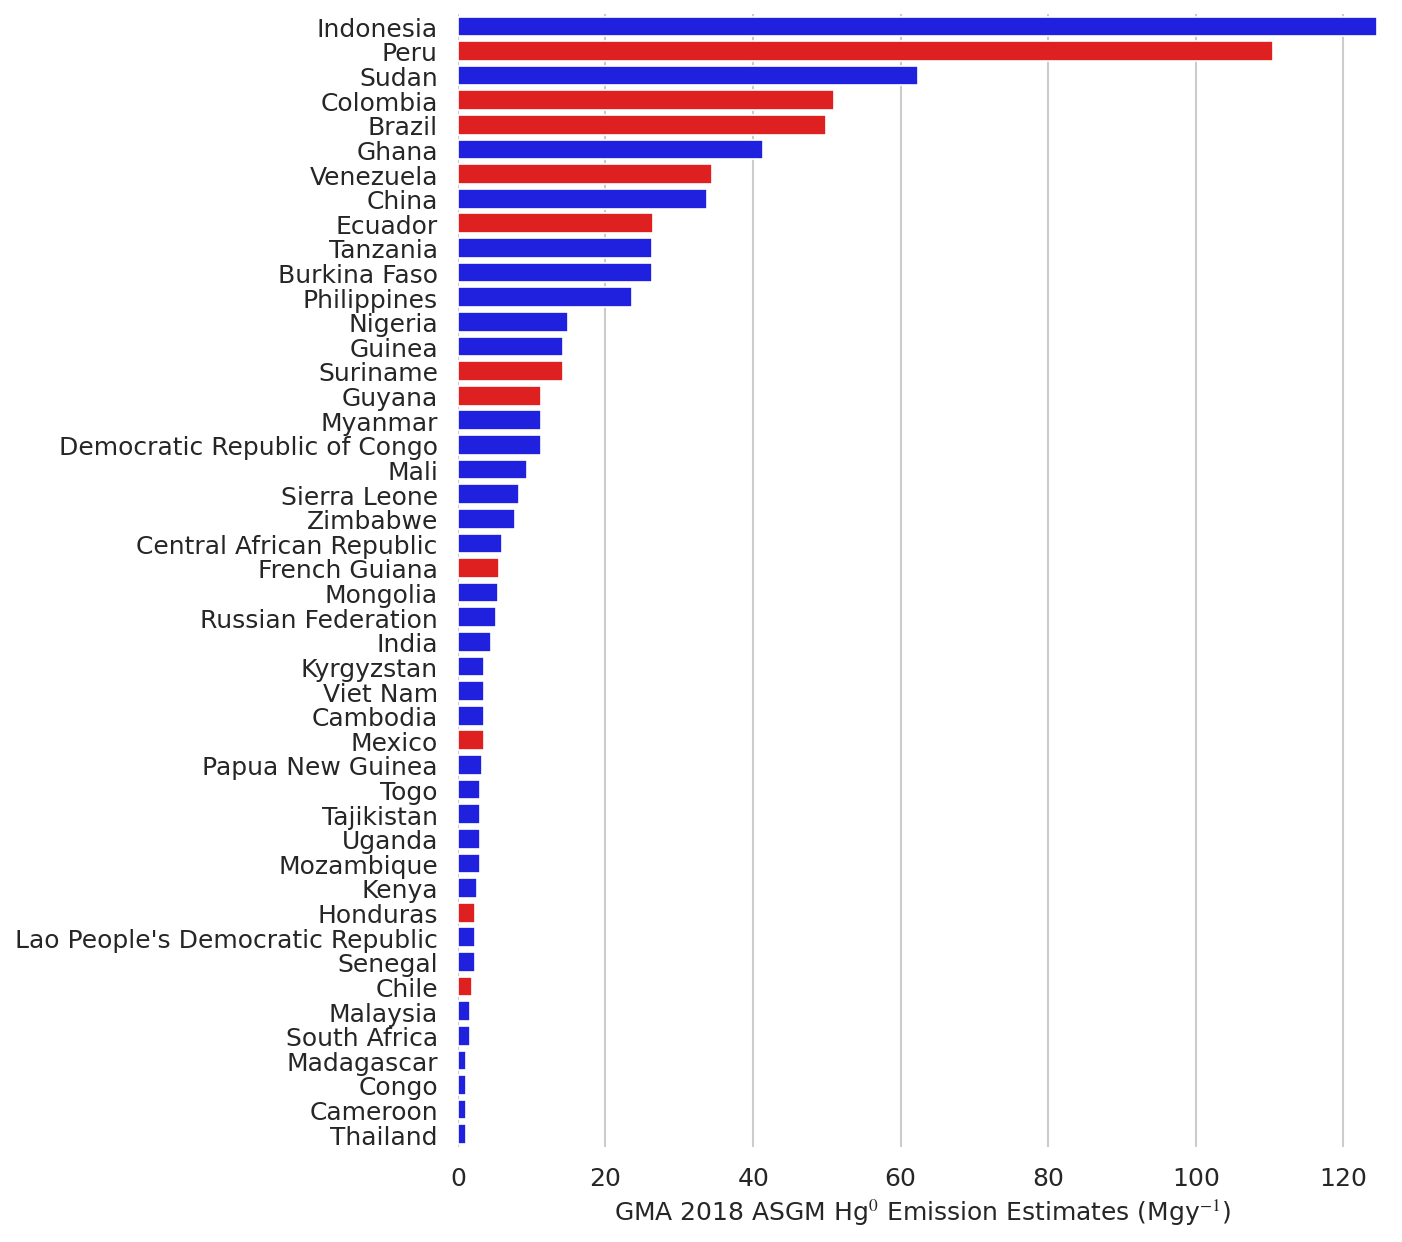

In [86]:


# Initialize the matplotlib figure
sns.set_style("whitegrid")
fig,ax = plt.subplots(figsize=(8, 10))
plot_data = air_emissions.drop(0, axis=0).sort_values(by='Emissions, t', ascending=False)
plot_data=plot_data[plot_data['Emissions, t']>1]

latam_emitters=['Peru','Colombia','Brazil','Bolivia','Suriname','Ecuador','French Guiana','Venezuela','Guyana','Chile','Honduras','Mexico']
# Load the example car crash dataset
# crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)
colors = ["blue" if i not in latam_emitters else "red" for i in plot_data.Country]
# Plot the total crashes
sns.set_color_codes("muted")

sns.barplot(x="Emissions, t", y="Country", data=plot_data ,
            label="Emissions", palette=colors)


ax.set(xlim=(0, 126), ylabel="",
       xlabel="GMA 2018 ASGM Hg$^0$ Emission Estimates (Mgy$^{-1}$)")
sns.despine(left=True, bottom=True)
# name='07-14-22_gma2018_top-asgm-emmiting-countries.pdf'
# savepath='/home/tzd/fs03/d1/tzd/Data_analysis/MIT_TPP_thesis/figures/'+name
# fig.savefig(savepath,bbox_inches='tight')

In [87]:
df_countries=pd.read_csv('countries.csv')
df_countries['NAME']=df_countries['NAME'].str.strip()
df_countries['ISO']= df_countries['ISO'].str.strip()

In [88]:
asgm_list=list(air_emissions['Country'])
iso=df_countries[df_countries['NAME'].isin(asgm_list)]
iso

,ISO,NAME
2,AGO,Angola
16,AZE,Azerbaijan
17,BDI,Burundi
19,BEN,Benin
...,...,...
241,VNM,Viet Nam
246,ZAF,South Africa
247,ZMB,Zambia
248,ZWE,Zimbabwe


In [89]:
emitters=list(ASGM_emissions['Country'].values)
len(emitters)

79

In [90]:
# df_emitters=df[df['country'].isin(emitters)]
# print(len(df_emitters))

In [91]:
df_asgm_air_hg=air_emissions.merge(iso,how='left',left_on='Country',right_on='NAME')

In [92]:
# WhGrYlRd.colors
import matplotlib.pyplot as plt
from gamap_colormap import WhGrYlRd
from matplotlib.colors import to_hex, to_rgb, CSS4_COLORS, LinearSegmentedColormap, ListedColormap
from matplotlib.cm import ScalarMappable
def find_closest_name(col):
    rv, gv, bv = to_rgb(col)
    min_colors = {}
    for col in CSS4_COLORS:
        rc, gc, bc = to_rgb(col)
        min_colors[(rc - rv) ** 2 + (gc - gv) ** 2 + (bc - bv) ** 2] = col
    closest = min(min_colors.keys())
    return min_colors[closest], np.sqrt(closest)

vals = np.linspace(0, 1, 12)
[(val, to_hex(WhGrYlRd(val))) for val in vals]

semi_wgyr = [find_closest_name(WhGrYlRd(val))[0] for val in vals]
semi_wgyr

['white',
 'paleturquoise',
 'lightskyblue',
 'mediumturquoise',
 'lightgreen',
 'greenyellow',
 'gold',
 'darkorange',
 'red',
 'red',
 'darkred',
 'maroon']

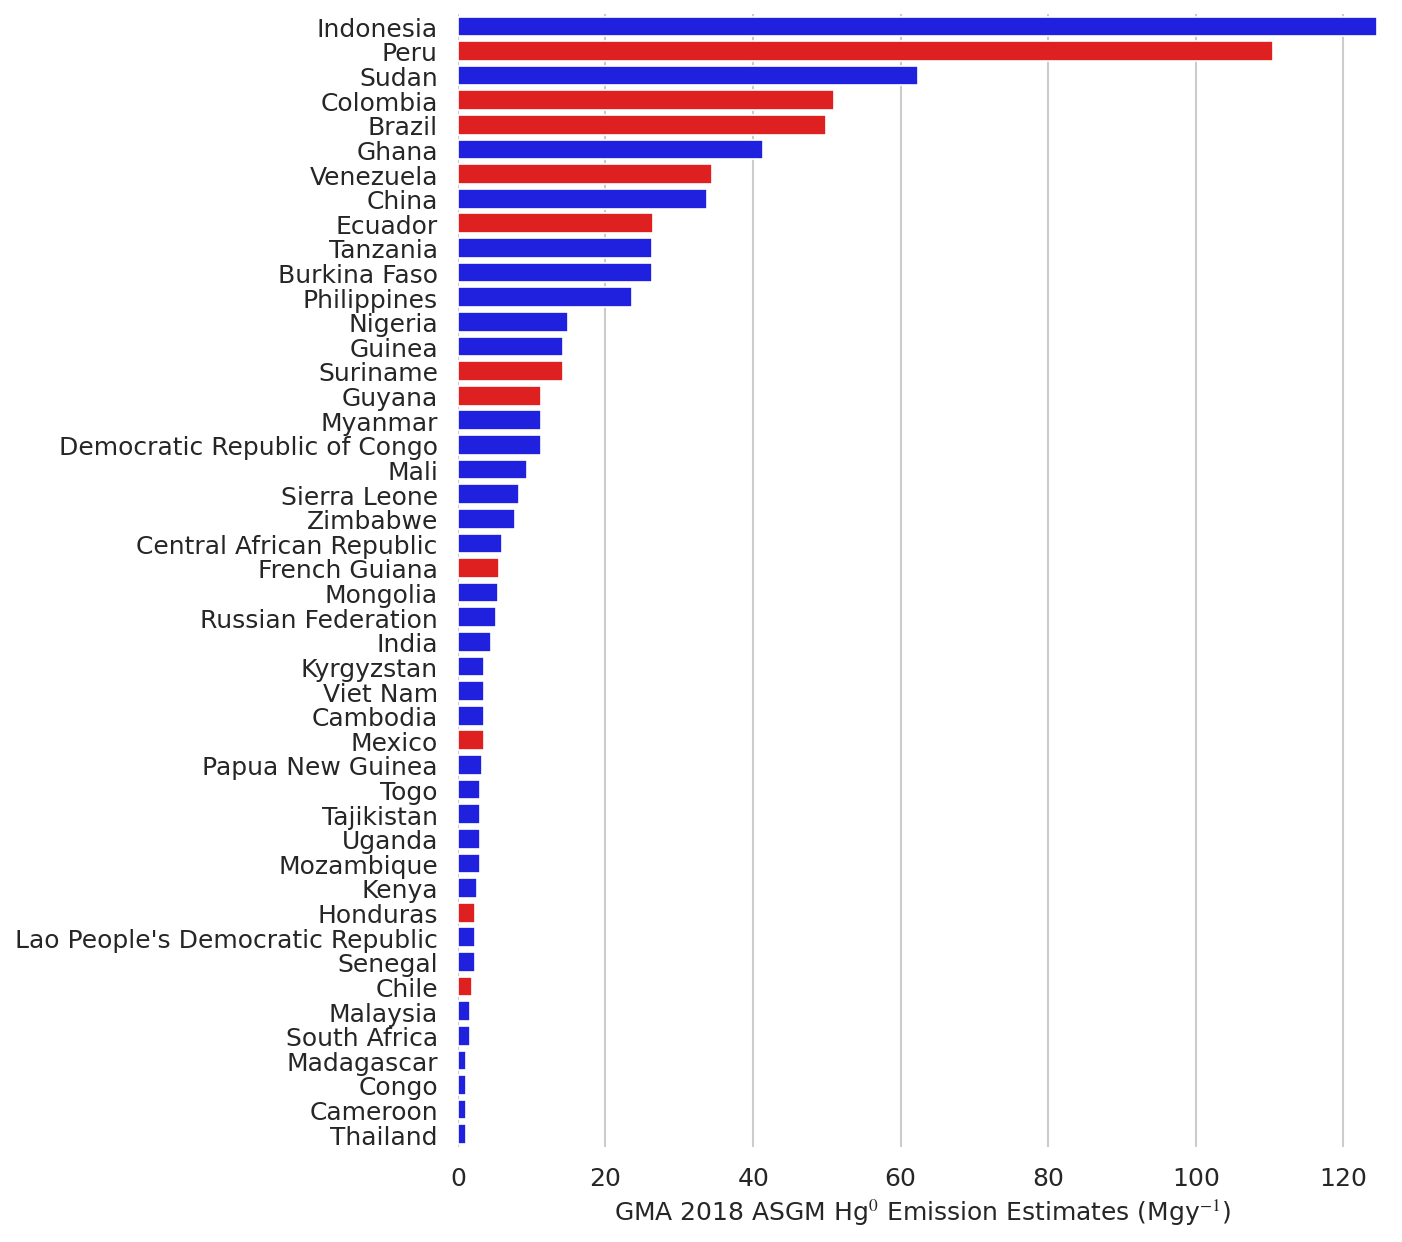

In [93]:
# Initialize the matplotlib figure
sns.set_style("whitegrid")
fig,ax = plt.subplots(figsize=(8, 10))
plot_data = air_emissions.drop(0, axis=0).sort_values(by='Emissions, t', ascending=False)
plot_data=plot_data[plot_data['Emissions, t']>1]

latam_emitters=['Peru','Colombia','Brazil','Bolivia','Suriname','Ecuador','French Guiana','Venezuela','Guyana','Chile','Honduras','Mexico']
# Load the example car crash dataset
# crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)
colors = ["blue" if i not in latam_emitters else "red" for i in plot_data.Country]
# Plot the total crashes
sns.set_color_codes("muted")

sns.barplot(x="Emissions, t", y="Country", data=plot_data ,
            label="Emissions", palette=colors)


ax.set(xlim=(0, 126), ylabel="",
       xlabel="GMA 2018 ASGM Hg$^0$ Emission Estimates (Mgy$^{-1}$)")
sns.despine(left=True, bottom=True)
# name='07-14-22_gma2018_top-asgm-emmiting-countries.pdf'
# savepath='/home/tzd/fs03/d1/tzd/Data_analysis/MIT_TPP_thesis/figures/'+name
# fig.savefig(savepath,bbox_inches='tight')

In [94]:
print(df_asgm_air_hg.head())
print(df_asgm_air_hg.columns)

     Country  Emissions, t  ISO       NAME
0    Bolivia          40.5  BOL    Bolivia
1     Guinea          14.3  GIN     Guinea
2  Nicaragua           0.7  NIC  Nicaragua
3       Peru         110.4  PER       Peru
4    Senegal           2.3  SEN    Senegal
Index(['Country', 'Emissions, t', 'ISO', 'NAME'], dtype='object')


In [95]:
df_asgm_air_hg.sort_values(by='Emissions, t', ascending=False).head()

,Country,"Emissions, t",ISO,NAME
16,Indonesia,124.5,IDN,Indonesia
3,Peru,110.4,PER,Peru
44,Sudan,62.3,SDN,Sudan
9,Colombia,51.0,COL,Colombia
6,Brazil,49.9,BRA,Brazil


In [96]:
import plotly.graph_objects as go
plotData=df_asgm_air_hg.sort_values(by='Emissions, t', ascending=False)

y=plotData['Emissions, t'][:20]
x = plotData['Country'][:20]
latam_emitters=['Peru','Colombia','Brazil','Bolivia','Suriname','Ecuador','French Guiana','Venezuela','Guyana','Chile','Honduras','Mexico']
colors = ["blue" if i not in latam_emitters else "red" for i in x]
fig = go.Figure(data=[go.Bar(
    x=x,
    y=y,
    marker_color=colors # marker color can be a single color value or an iterable
)])
# fig.update_layout(title_text='Least Used Feature')
# fig.update_layout(showlegend=True)
fig.update_layout(xaxis_tickangle=30,
                  xaxis=dict(tickmode='linear'),
                  template="simple_white",
                  legend=dict(
        title=None, orientation="h", y=1, yanchor="bottom", x=0.5, xanchor="center"))
fig.show()

In [97]:
x

16                       Indonesia
3                             Peru
44                           Sudan
9                         Colombia
                  ...             
32    Democratic Republic of Congo
39                         Myanmar
13                          Guyana
18                            Mali
Name: Country, Length: 20, dtype: object

In [98]:
# df = px.data.gapminder().query("country == 'Canada'")
# fig = px.bar(df_asgm_air_hg, x='Country', y='Emissions, t',
#              hover_data=['NAME', 'Emissions, t'], color='Emissions, t',colorscale = semi_wgyr,
#              labels={'Emissions, t':'Hg$^0$ Emissions'}, height=400)
# fig.show()


In [99]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth( 
                    locations=df_asgm_air_hg['ISO'],
                    z=df_asgm_air_hg["Emissions, t"].astype(float), # lifeExp is a column of gapminder
                    # hover_name=df_asgm_air_hg["Country"],
                    colorscale = semi_wgyr,#'Reds',
                    colorbar_orientation = 'h',
                    colorbar_title = "ASGM Mercury Emission Estimates (tons/year)",
                    colorbar_titleside = 'bottom',
                    colorbar_y = -0.15,
                    # range_color=(0, df_asgm_air_hg["Emissions, t"].max())
                    colorbar_len = 0.75,
                    # colorbar_ticklabelstep=10
                    
                    ))# column to add to hover information)

fig.update_geos(fitbounds="locations", visible=False,
                    showcountries=True)
fig.update_geos(projection_type="natural earth")
fig.update_layout(height=500, margin={"r":0,"t":0,"l":0,"b":0})
fig_name='07-14-22_gma2018_asgm-emmiting-countries.svg'
path=fig_path+fig_name
pio.write_image(fig, path,format='svg',width=700,height=400)
fig.show()

In [100]:
# for item in asgm_list:
#     if item in list(iso['NAME'].values):
#         print
#         pass
#     else:
#         print(item)
df_asgm_air_hg

,Country,"Emissions, t",ISO,NAME
0,Bolivia,40.5,BOL,Bolivia
1,Guinea,14.3,GIN,Guinea
2,Nicaragua,0.7,NIC,Nicaragua
3,Peru,110.4,PER,Peru
...,...,...,...,...
75,Eswatini,0.2,SWZ,Eswatini
76,Ukraine,0.2,UKR,Ukraine
77,Uzbekistan,0.2,UZB,Uzbekistan
78,Zambia,0.2,ZMB,Zambia


In [101]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
plotData['Country'].replace('Democratic Republic of Congo', 'DRC', inplace=True)
y=plotData['Emissions, t'][:19]
x = plotData['Country'][:19]
# Initialize figure with subplots
fig = make_subplots(
    rows=2, cols=1,
    row_heights=[0.9, 0.4],
    specs=[[{"type": "choropleth"}],[{"type": "bar"}]],
    vertical_spacing=0)

# Add scattergeo globe map of volcano locations
fig.add_trace(go.Bar(
    x=x,
    y=y,
    text=y,
    texttemplate='%{text:.2s}', 
    textposition='outside',
    marker={'color': y,
            'colorscale': semi_wgyr,
            }), 
              # marker color can be a single color value or an iterable
    row=2, col=1
)

# Add locations bar chart
fig.add_trace(
    go.Choropleth( 
                    locations=df_asgm_air_hg['ISO'],
                    z=df_asgm_air_hg["Emissions, t"].astype(float), # lifeExp is a column of gapminder
                    # hover_name=df_asgm_air_hg["Country"],
                    colorscale = semi_wgyr,#'Reds',
                    colorbar_orientation = 'v',
                    colorbar_title = "Hg(tons/year)",
                    colorbar_titleside = 'top',
                    # colorbar_y = -0.5,
                    # range_color=(0, df_asgm_air_hg["Emissions, t"].max())
                    colorbar_len = 0.75,
                    coloraxis='coloraxis'
                    # colorbar_ticklabelstep=10
                    
                    
                    ),
    row=1, col=1
)

# Add 3d surface of volcano
fig.update_traces(marker_cmax=df_asgm_air_hg["Emissions, t"].max(), selector=dict(type='bar'))
fig.update_traces(marker_cmin=df_asgm_air_hg["Emissions, t"].min(), selector=dict(type='bar'))
# fig.update_traces(marker_colorbar_title_text="Hg(tons/year)", selector=dict(type='choropleth'))

# Update geo subplot properties
fig.update_geos(
    projection_type="natural earth",
    fitbounds="locations", 
    visible=False,
    showcountries=True,
    resolution=110, 
)

# Rotate x-axis labels
fig.update_xaxes(tickangle=35)

# Set theme, margin, and annotation in layout
fig.update_layout(
    autosize=False,
     width=900,
     height=600,
    template="plotly_white",
    margin={"r":0,"t":0,"l":0,"b":0},
    yaxis =  {'showgrid': False} 
)
fig.update_yaxes(range=[0,145])
fig.update_coloraxes(
    cmax=df_asgm_air_hg["Emissions, t"].max(),
    cmin=df_asgm_air_hg["Emissions, t"].min(),
    
    colorbar_dtick=10,
    colorbar_tick0=0
    
)
fig.update_layout(coloraxis=dict(colorscale=semi_wgyr,))
fig.update_coloraxes(colorscale=semi_wgyr,colorbar_title_text="Hg (t/y)")
fig_name='07-14-22_gma2018_asgm-emmiting-countries.svg'
path=fig_path+fig_name
pio.write_image(fig, path,format='svg',width=700,height=400)
fig.show()

In [102]:
df_emission_sectors=pd.DataFrame([GlobalHgInventry]).T.reset_index()
df_emission_sectors=df_emission_sectors.rename(columns={"index": "Emission Sectors", 0: "Emissions Amount,t"})
df_emission_sectors


,Emission Sectors,"Emissions Amount,t"
0,Fuel combustion,533
1,Industry Sectors,614
2,Intentional Use(including product waste),239
3,Artisanal and Small Scale Gold Mining,838
4,Total,2220
5,Total Lower,2000
6,Total Upper,2820


In [103]:
fig = px.bar(df_emission_sectors[:4], x="Emission Sectors", y="Emissions Amount,t", color="Emission Sectors",
             orientation="v", hover_name="Emissions Amount,t",
             color_discrete_sequence=[
                 "orange", "red", "green", "blue"],
             title="Hg Emission Sectors"
             )
 
fig.show()

In [104]:
df_emission_sectors[:4]

,Emission Sectors,"Emissions Amount,t"
0,Fuel combustion,533
1,Industry Sectors,614
2,Intentional Use(including product waste),239
3,Artisanal and Small Scale Gold Mining,838


In [105]:
list(df_emission_sectors[:4]['Emissions Amount,t'])

[533, 614, 239, 838]

In [106]:
import plotly.graph_objects as go

labels = list(df_emission_sectors[:4]['Emission Sectors'])
values = list(df_emission_sectors[:4]['Emissions Amount,t'])
colors=[ "blue", "red", "green","orange"]
ind_names=['533 Mg', '614 Mg', '239 Mg', '838 Mg']

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(  labels=labels, values=values,text=ind_names, textinfo='text+percent',pull=[0, 0, 0, 0.05],marker_colors=colors)])
fig.update_traces(hoverinfo='label+percent', textfont_size=14,
                  marker=dict(colors=colors))
fig_name='07-24-22_gma2018_hg-emissions_by-industry.svg'
path=fig_path+fig_name
pio.write_image(fig, path,format='svg',width=700,height=400)
fig.show()


In [107]:
NAPHG=pd.DataFrame(pd.read_csv('NAPsubmits.csv'))
NAPHG

,Country,NAP_Mercury_use t/y,GMA_Mercury_use t/y,Target%,Taget_year
0,Central African Republic,0.0000,8.0,NaN,NaN
1,Congo,0.0200,1.5,NaN,NaN
2,Lao PDR,0.2295,3.0,NaN,NaN
3,Mongolia,0.2350,11.5,NaN,NaN
...,...,...,...,...,...
13,Madagascar,31.1000,1.5,50%,2022.0
14,Mali,33.3000,12.5,10%,2023.0
15,Guinea,42.1000,19.1,50%,2022.0
16,Burkina Faso,77.6000,35.1,50%,2024.0


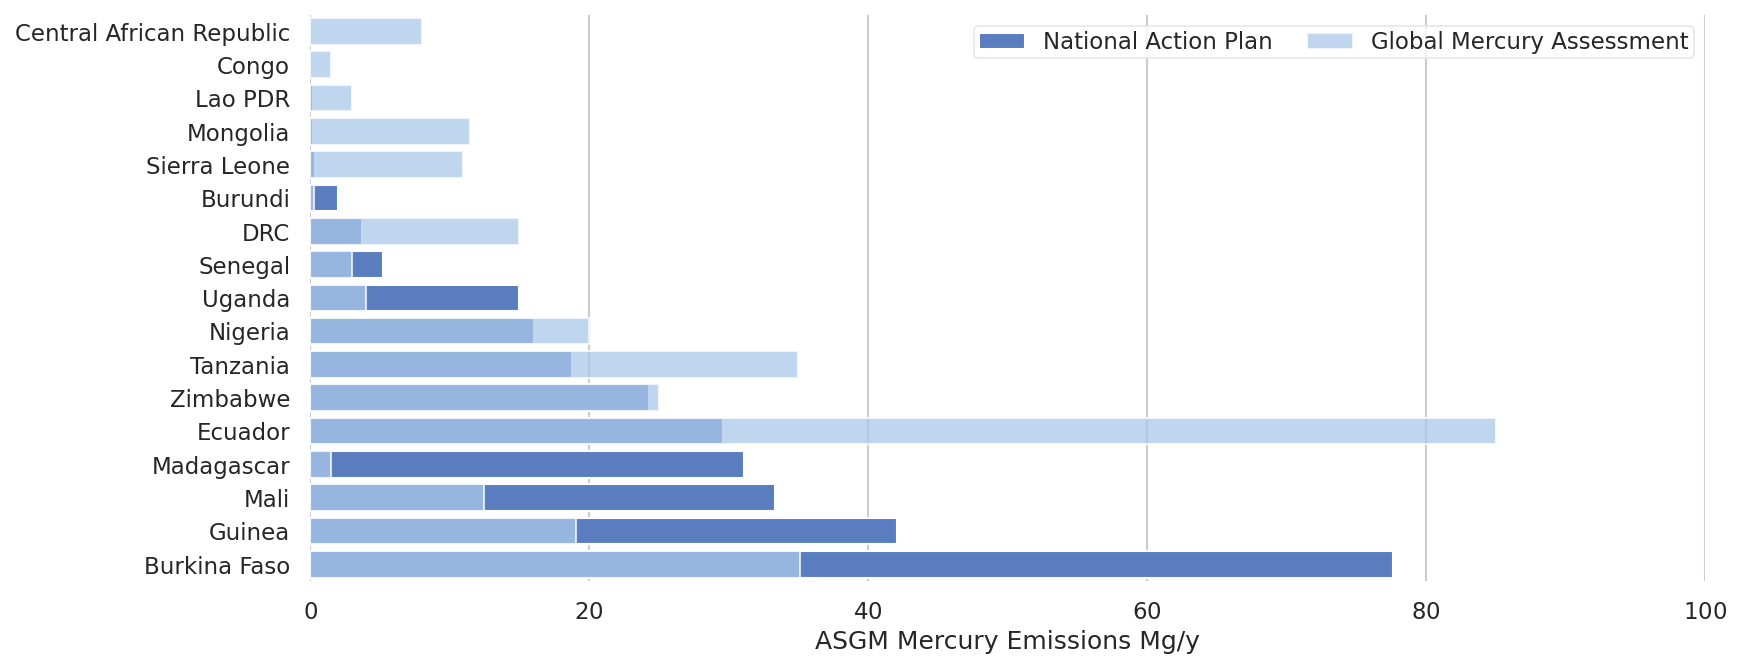

In [108]:

import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 5))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("muted")

sns.barplot(x="NAP_Mercury_use t/y", y="Country", data=NAPHG,
            label="National Action Plan", color="b")

#Plot the crashes where alcohol was involved
sns.set_color_codes("pastel")
sns.barplot(x="GMA_Mercury_use t/y", y="Country", data=NAPHG,
            label="Global Mercury Assessment", color="b",alpha=0.75)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 100), ylabel="",
       xlabel="ASGM Mercury Emissions Mg/y")
sns.despine(left=True, bottom=True)
fig_name='07-24-22_global-hg-emission-estimates_vs_nap_estimates.svg'
path=fig_path+fig_name
fig.savefig(path,bbox_inches='tight')